# $$Ziad$$ $$Mohamed$$ $$Taha$$
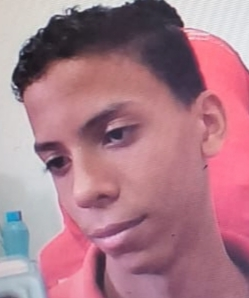

# ***import*** `libraries`

In [3]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# $load$ The `Data` && ***normalization***

In [7]:
# Step 2: Load and preprocess the CIFAR-10 dataset
# The CIFAR-10 dataset is divided into training and testing datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1 by dividing by 255
train_images, test_images = train_images / 255.0, test_images / 255.0

NameError: name 'datasets' is not defined

In [49]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# ***`build`*** The $Model$

In [7]:
# Step 3: Build the CNN model
# We'll use a Sequential model where layers are added one after another
model = models.Sequential()

# First Convolutional Layer: 32 filters, 3x3 kernel, ReLU activation, input shape matches the image size (32x32x3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Max Pooling Layer: Reduces spatial dimensions by taking the maximum value in a 2x2 window
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer: 64 filters, 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Second Max Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer: 64 filters, 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Step 4: Add Dense Layers for classification
# Flatten the 3D output to 1D for the fully connected layers
model.add(layers.Flatten())

# Fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer: 10 units (one for each class), softmax activation to output probabilities
model.add(layers.Dense(10, activation='softmax'))

# Step 5: Compile the model
# We use the Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## train 
# $Model$

In [9]:
history=model.fit(train_images,train_labels,
                  epochs=10,
                  batch_size(64),
                  validation_data(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3539 - loss: 1.7456 - val_accuracy: 0.5477 - val_loss: 1.2815
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5815 - loss: 1.1785 - val_accuracy: 0.6304 - val_loss: 1.0596
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6451 - loss: 1.0114 - val_accuracy: 0.6569 - val_loss: 0.9938
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6901 - loss: 0.8840 - val_accuracy: 0.6739 - val_loss: 0.9374
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7111 - loss: 0.8197 - val_accuracy: 0.6721 - val_loss: 0.9608
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7299 - loss: 0.7681 - val_accuracy: 0.6904 - val_loss: 0.8904
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7507 - loss: 0.7066 - val_accuracy: 0.7025 - val_loss: 0.8851
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7650 - loss: 0

# ***`Accuracy`*** *of* $Model$

In [11]:

# Step 7: Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 1s - 3ms/step - accuracy: 0.7058 - loss: 0.8993

Test accuracy: 0.7057999968528748


# `Visualization` ***of*** $training && test$

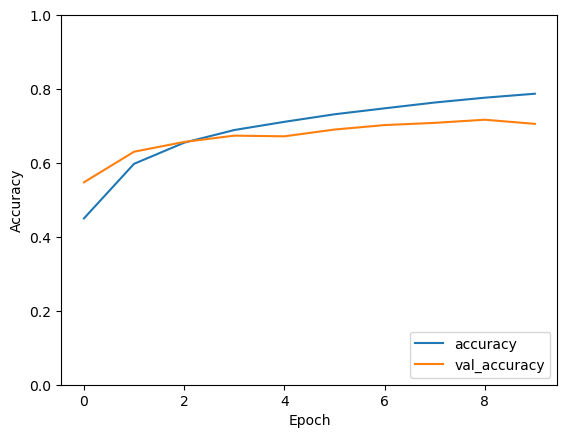

In [13]:
# Step 8: Plot training and validation accuracy/loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# $Save && Donload$ ***the*** $Model$

In [17]:
# Save the entire model to a file
model.save("D:\\Ziad\\CNN_Model.h5")

# `load` *the* $Model$

In [68]:
from tensorflow.keras.models import load_model

# Load the entire model from the .h5 file
model = load_model("D:\\Ziad\\CNN_Model.h5")


# $load image && incoding $ ***for this*** $image$
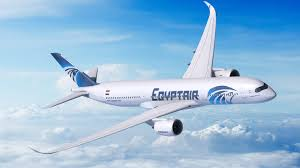

In [71]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = "C:\\Users\\hp\\Pictures\\images (1).jpeg"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(32, 32))  # Resize the image to 32x32 pixels
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 32, 32, 3)
img_array = img_array / 255.0  # Normalize the image (assuming your model was trained with normalized images)


# ***$pridect & argmax$*** 

In [74]:
# Predict the class of the image
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


# $$result$$ $$of$$ $$pridect$$

In [82]:
class_names = ['airplane automobile'										
,'bird'										
,'cat'										
,'deer'										
,'dog'										
,'frog'										
,'horse'										
,'ship'										
,'truck']  # Replace with your actual class names
print(f"Predicted class: {class_names[predicted_class[0]]}")


Predicted class: airplane automobile


 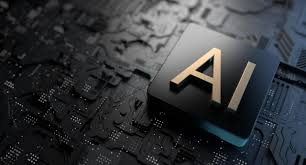   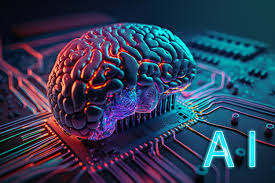